# Primary productivity

Use conda environment python3

# First, load libraries

In [1]:
import netcdf_tools
import numpy as np

# Select year

In [2]:
nbyr=10
years=range(1,nbyr+1)
array1d_iT_iTforplot=np.arange(1,365*nbyr+1)
array1d_iT_iTforpcolormesh=np.arange(1,365*nbyr+2)
locs=list()
xticklabels=range(5,nbyr+1,5)
for year in xticklabels:
    loc=1+365*(year-1)
    locs.append(loc)

# Grid

RF is the r coordinate of cell interface (in m)

In [3]:
gridfile='grid.t001.nc';
RFfull=netcdf_tools.read_netcdf(gridfile,'RF')
RF=RFfull[RFfull>-151]

In [4]:
# 80 characters
#xxxxxxxxx xxxxxxxxx xxxxxxxxx xxxxxxxxx xxxxxxxxx xxxxxxxxx xxxxxxxxx xxxxxxxxl

## Read outputs

In [5]:
gudfile='rates.0000000000.t001.nc';

# mmol C m^-3 s^-1
array2d_idepth_iT_PPfullmmolConm3s\
=netcdf_tools.read_netcdf(gudfile, 'PP').squeeze().transpose()
# from 0 m to -151 m
array2d_idepth_iT_PPmmolConm3s=array2d_idepth_iT_PPfullmmolConm3s[0:(RF.size-1),:]
molarmassC=12.0107 # g C (mol C)^-1
stod=86400 # 3600*24 s per d
array2d_idepth_iT_PP=array2d_idepth_iT_PPmmolConm3s*molarmassC*stod # mg C m^-3 d^-1

## Primary productivity

In [6]:
import matplotlib
import matplotlib.pyplot as plt

In [7]:
# adapted from
# https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
# answer of Pedro M Duarte
SMALL_SIZE = 8
MEDIUM_SIZE = 20
BIGGER_SIZE = 28

# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the y tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

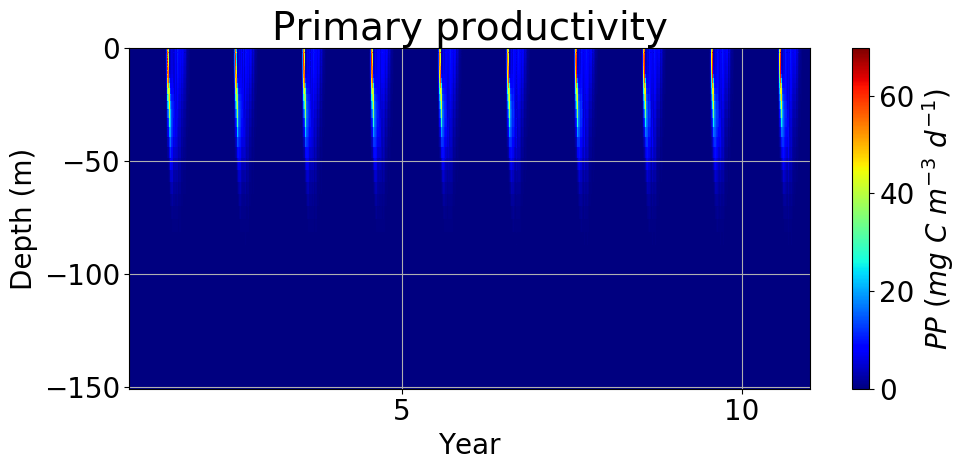

In [8]:
plt.figure(figsize=(10,4.8))
plt.pcolormesh(array1d_iT_iTforpcolormesh,
               RF,
               array2d_idepth_iT_PP,
               cmap='jet'
              )
plt.title('Primary productivity')
plt.xlabel('Year')
plt.xticks(locs,xticklabels)
plt.ylabel('Depth (m)')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$PP\ (mg\ C\ m^{-3}\ d^{-1})$')
plt.tight_layout()

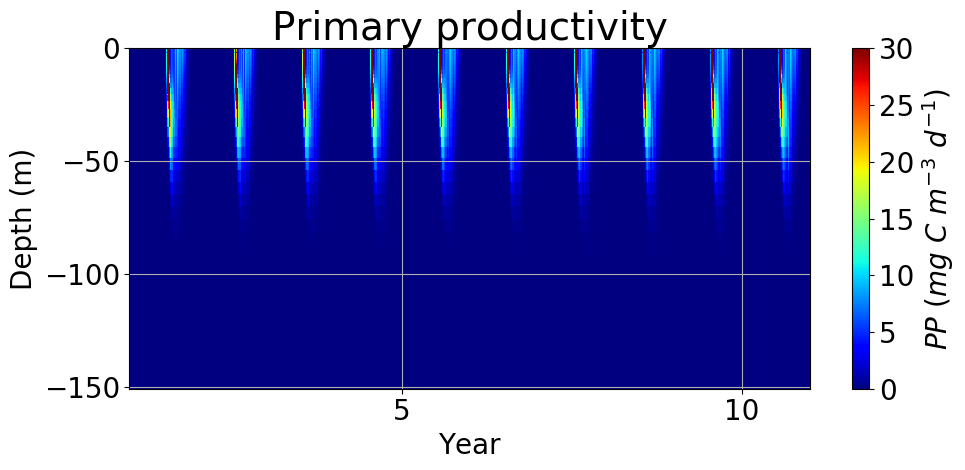

In [9]:
plt.figure(figsize=(10,4.8))
plt.pcolormesh(array1d_iT_iTforpcolormesh,
               RF,
               array2d_idepth_iT_PP,
               cmap='jet',
               vmin=0,
               vmax=30
              )
plt.title('Primary productivity')
plt.xlabel('Year')
plt.xticks(locs,xticklabels)
plt.ylabel('Depth (m)')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$PP\ (mg\ C\ m^{-3}\ d^{-1})$')
plt.tight_layout()
plt.savefig('car.0000000000.t001.allyears.pp.jupyter.png')

Figure. Primary productivity ($mg\ C\ m^{-3}\ d^{-1}$) for a ten years simulation at the Green Edge ice camp location (67.4797&deg;N, -63.7895&deg;E) in 2016 with MITgcm and DARWIN. Note that a red dark color means a primary productivity **greater** or equal than the maximum value of the colorbar ($30\ mg\ C\ m^{-3}\ d^{-1}$). There are some grid cells with a primary productivity much greater.

In [10]:
np.max(array2d_idepth_iT_PP)

69.7207062746663

## Daily primary productivity

drF is the r cell face separation, meaning the thickness of each depth layer (in m)

it corresponds to delR on https://mitgcm.readthedocs.io/en/latest/getting_started/getting_started.html#grid

In [11]:
drF=netcdf_tools.read_netcdf(gridfile,'drF')

In [12]:
import vstats
array1d_iT_dpp=vstats.vintegrate(array2d_idepth_iT_PP,drF,0,RF.size-1)

In [13]:
array2d_idepth_iT_PP[:,0].tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

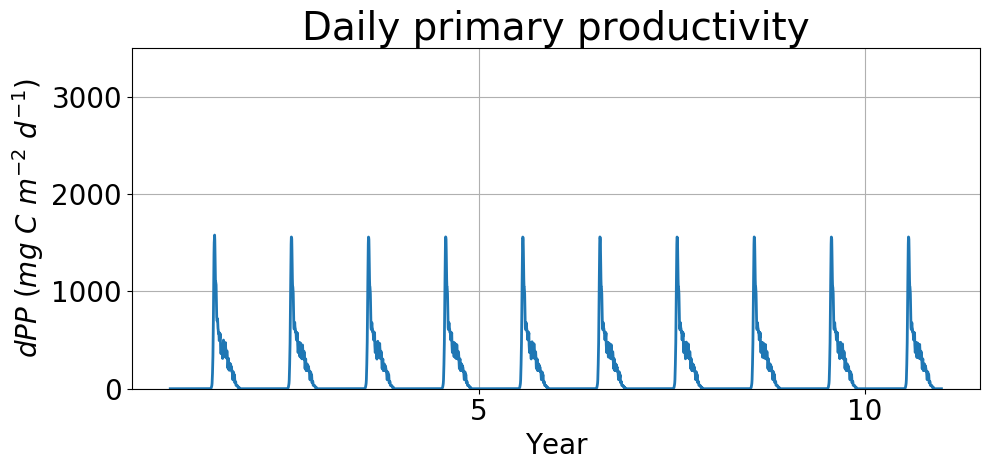

In [14]:
plt.figure(figsize=(10,4.8))
plt.plot(array1d_iT_iTforplot,array1d_iT_dpp,linewidth=2.0)
plt.title('Daily primary productivity')
plt.xlabel('Year')
plt.ylim(0,3500)
plt.ylabel('$dPP\ (mg\ C\ m^{-2}\ d^{-1})$')
plt.grid(True)
plt.xticks(locs,xticklabels)
plt.tight_layout()
plt.savefig('car.0000000000.t001.allyears.dpp.png')

## Annual primary productivity

In [15]:
nbyears=array1d_iT_dpp.size//365
array1d_iyr_yr=np.arange(1,nbyears+1)

In [16]:
# annual primary productivity in mg C m^-2 yr^-1
array1d_iyr_app=np.zeros(nbyears)
for iyr in range(nbyears):
    app=sum(array1d_iT_dpp[iyr*365:(iyr+1)*365])
    array1d_iyr_app[iyr]=app
# annual primary productivity in g C m^-2 yr^-1
array1d_iyr_app=array1d_iyr_app/1000

In [17]:
array1d_iT_dpp[200]

162.12815164439357

In [18]:
array1d_iyr_app

array([51.89477105, 51.97879997, 52.05077451, 52.00236693, 52.04558146,
       52.00949926, 52.03819696, 52.01222554, 52.03296949, 52.01402274])

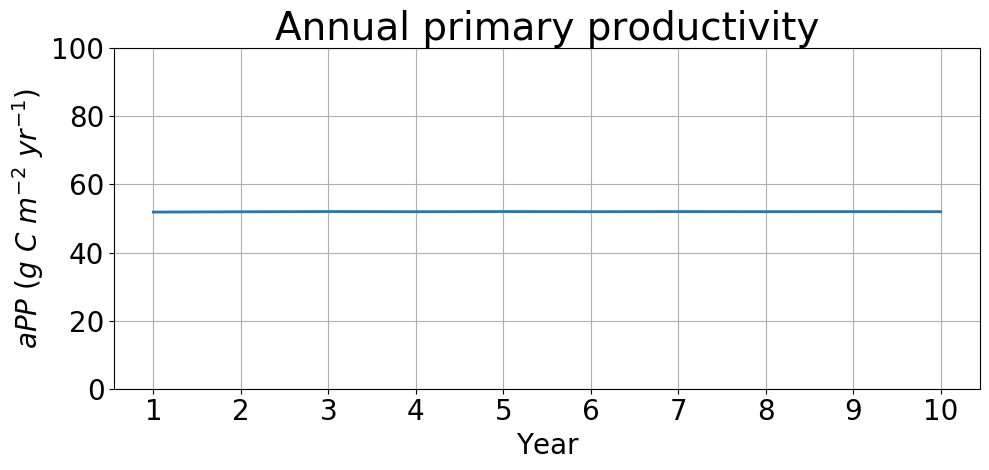

In [19]:
plt.figure(figsize=(10,4.8))
plt.plot(array1d_iyr_yr,
         array1d_iyr_app,
         linewidth=2.0)
plt.title('Annual primary productivity')
plt.xlabel('Year')
plt.ylim(0,100)
plt.ylabel('$aPP\ (g\ C\ m^{-2}\ yr^{-1})$')
plt.grid(True)
plt.xticks(array1d_iyr_yr)
plt.tight_layout()
plt.savefig('car.0000000000.t001.allyears.app.png')

In [20]:
array1d_iyr_app

array([51.89477105, 51.97879997, 52.05077451, 52.00236693, 52.04558146,
       52.00949926, 52.03819696, 52.01222554, 52.03296949, 52.01402274])

Annual productivity of last year of 10 years ($in\ g\ C\ m^{-2}\ yr^{-1}$)

In [21]:
array1d_iyr_app[-1]

52.01402274443295

## Drift of annual primary productivity

In [22]:
array1d_iyr_yr=np.arange(2,nbyears+1)
array1d_iyr_deltaapp=np.zeros(nbyears-1)
for iyr in np.arange(1,nbyears):
    deltaapp=array1d_iyr_app[iyr]-array1d_iyr_app[iyr-1]
    array1d_iyr_deltaapp[iyr-1]=deltaapp

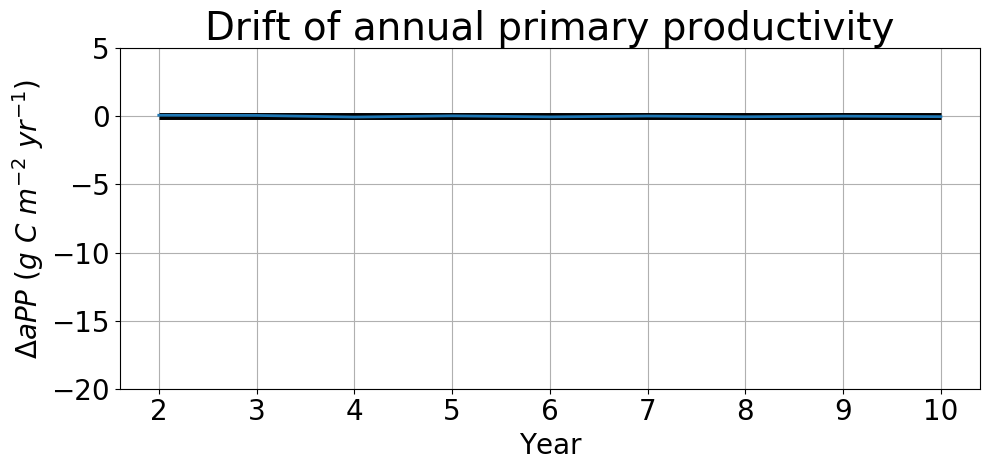

In [23]:
plt.figure(figsize=(10,4.8))
plt.plot(array1d_iyr_yr,
         array1d_iyr_deltaapp,
         linewidth=2.0)
plt.hlines(0,
           xmin=array1d_iyr_yr[0],
           xmax=array1d_iyr_yr[-1],
           linewidth=5.0)
plt.title('Drift of annual primary productivity')
plt.xlabel('Year')
plt.ylim(-20,5)
plt.ylabel('$\Delta aPP\ (g\ C\ m^{-2}\ yr^{-1})$')
plt.grid(True)
plt.xticks(array1d_iyr_yr)
plt.tight_layout()
plt.savefig('car.0000000000.t001.allyears.deltaapp.png')

Let $aPP$ be the annual primary productivity ($g\ C\ m^{-2}\ yr^{-1}$) and $iyr$ the year.

$\Delta\ aPP(iyr)=aPP(iyr)-aPP(iyr-1)$